In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("46 - train.csv")

In [35]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6255,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


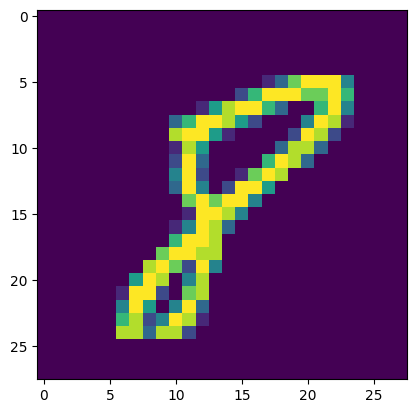

In [37]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))
plt.show()

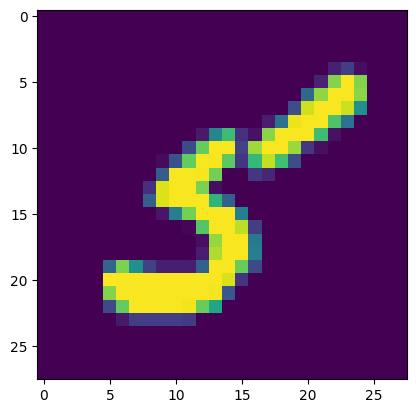

In [38]:
plt.imshow(df.iloc[18308,1:].values.reshape(28,28))
plt.show()

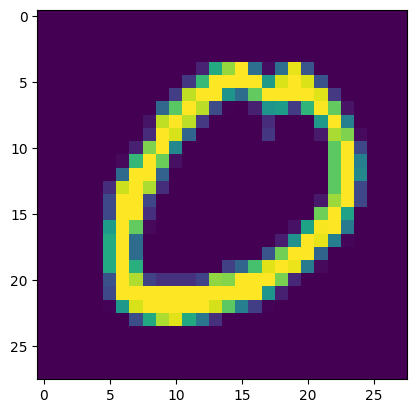

In [39]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))
plt.show()

In [40]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train.shape

(33600, 784)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [46]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

7.91765570640564


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred )

0.9648809523809524

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=300)

In [59]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [60]:
X_train_trf.shape

(33600, 300)

In [61]:
knn = KNeighborsClassifier()

In [62]:
knn.fit(X_train_trf,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [63]:
y_pred = knn.predict(X_test_trf)

In [64]:
y_pred

array([8, 1, 9, ..., 3, 0, 9], shape=(8400,))

In [66]:
accuracy_score(y_test,y_pred)

0.9467857142857142

In [73]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test,y_pred))
    

0.2580952380952381
0.3236904761904762
0.5104761904761905
0.6663095238095238
0.7378571428571429
0.8227380952380953
0.8436904761904762
0.8721428571428571
0.886547619047619
0.9055952380952381
0.9116666666666666
0.9184523809523809
0.9276190476190476
0.9351190476190476
0.9384523809523809
0.9379761904761905
0.9407142857142857
0.94
0.9425
0.9442857142857143
0.9438095238095238
0.9441666666666667
0.9442857142857143
0.9457142857142857
0.9484523809523809
0.9479761904761905
0.9478571428571428
0.9471428571428572
0.949047619047619
0.9491666666666667
0.9507142857142857
0.9513095238095238
0.95
0.9504761904761905
0.950952380952381
0.9519047619047619
0.9517857142857142
0.9527380952380953
0.9533333333333334
0.9528571428571428
0.9522619047619048
0.9522619047619048
0.9523809523809523
0.9533333333333334
0.9528571428571428
0.9530952380952381
0.9530952380952381
0.9533333333333334
0.9527380952380953
0.9533333333333334
0.9545238095238096
0.954047619047619
0.9541666666666667
0.9541666666666667
0.9546428571428571

In [75]:
# transform to a 2D coordinate system 
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [76]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]], shape=(33600, 2))

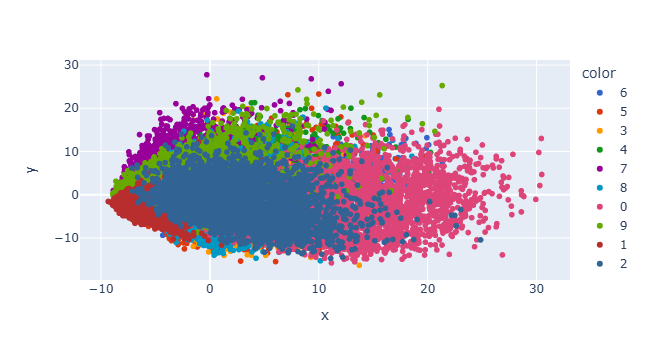

In [79]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y=X_train_trf[:,1],
                color = y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [80]:
# transfom in 3d
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [81]:
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]], shape=(33600, 3))

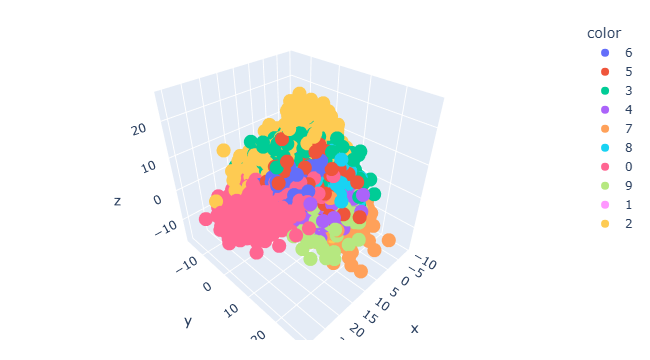

In [103]:
# If X_train_trf is already an array, just rename it for clarity
X_arr = X_train_trf  # no .values needed

y_train_trf = y_train.astype(str)

import plotly.express as px

fig = px.scatter_3d(
    x=X_arr[:, 0],
    y=X_arr[:, 1],
    z=X_arr[:, 2],
    color=y_train_trf
)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()


In [105]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023401, 26.74459621])

In [107]:
pca.components_
# Eigen vector

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(3, 784))

In [108]:
pca.components_.shape
# Eigen vector

(3, 784)

In [109]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [110]:
# transfom in 3d
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [111]:
pca.explained_variance_.shape

(784,)

In [112]:
pca.components_.shape

(784, 784)

In [114]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

<function matplotlib.pyplot.show(close=None, block=None)>

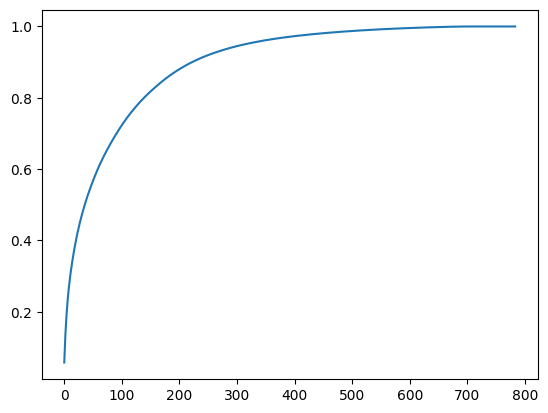

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show